In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("D:\\code\\Quantitative research\\Nat_Gas.csv")
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [7]:
df['Dates'] = pd.to_datetime(df['Dates'])
df = df.sort_values('Dates')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15544\246741406.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


In [8]:
df.set_index('Dates', inplace=True)

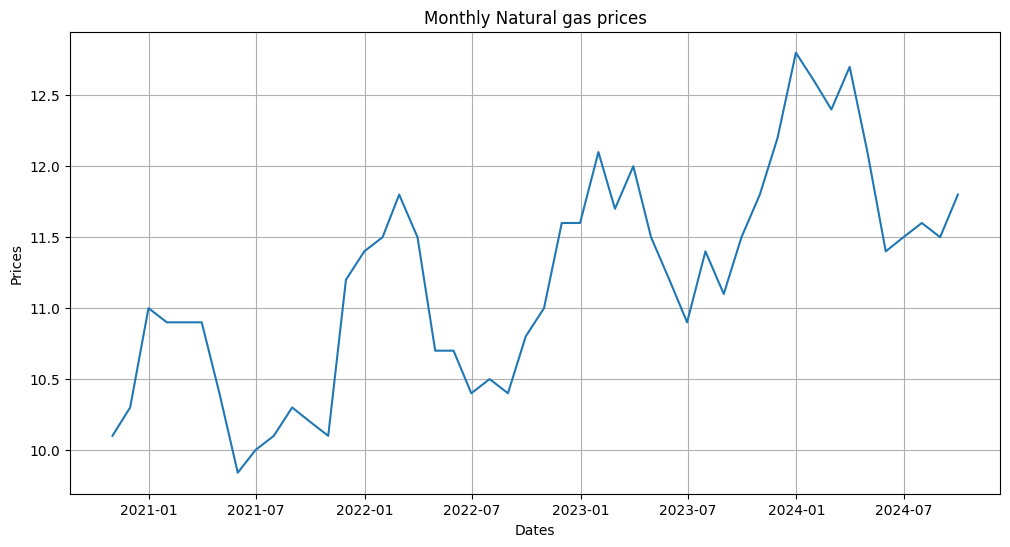

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index,df['Prices'])
plt.title("Monthly Natural gas prices")
plt.xlabel("Dates")
plt.ylabel('Prices')
plt.grid(True)
plt.show()

In [10]:
df['Month'] = df.index.month

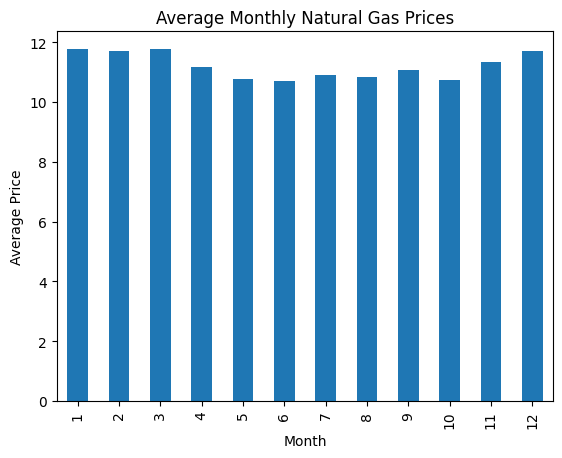

In [11]:
monthly_avg = df.groupby('Month')['Prices'].mean()

monthly_avg.plot(kind='bar',title='Average Monthly Natural Gas Prices',xlabel='Month',ylabel='Average Price')
plt.show()

In [12]:
daily_df = df.resample('D').interpolate(method='linear')

In [13]:
daily_df.loc['2022-03-15']

Prices    11.654839
Month      2.483871
Name: 2022-03-15 00:00:00, dtype: float64

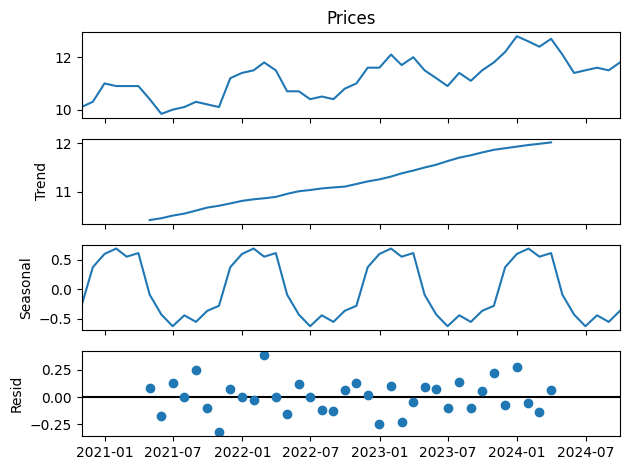

In [14]:
## Now deomposing time series using statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Prices'],model = 'additive', period=12)

decomposition.plot()
plt.show()

In [17]:
## Now forecasting 1 year into the future using sarima model

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    df['Prices'],
    order=(1,1,1),
    seasonal_order=(1,1,1,12)
)

results = model.fit()

C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [18]:
forecast = results.get_forecast(steps=12)   
future_prices = forecast.predicted_mean

In [21]:
future_dates = pd.date_range(
    start = df.index[-1] + pd.DateOffset(months=1),
    periods=12,
    freq='M'
)

future_df = pd.DataFrame(
    {'Prices': future_prices.values},
    index = future_dates
)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15544\2413694987.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(


In [22]:
full_df = pd.concat([df[['Prices']], future_df])

In [23]:
full_daily = full_df.resample('D').interpolate()

In [24]:
def estimate_price(date):
    date = pd.to_datetime(date)

    if date < full_daily.index.min() or date > full_daily.index.max():
        raise ValueError("Date out of range")
    
    return float(full_daily.loc[date, 'Prices'])

In [25]:
estimate_price("2025-06-15")


12.054359373827428

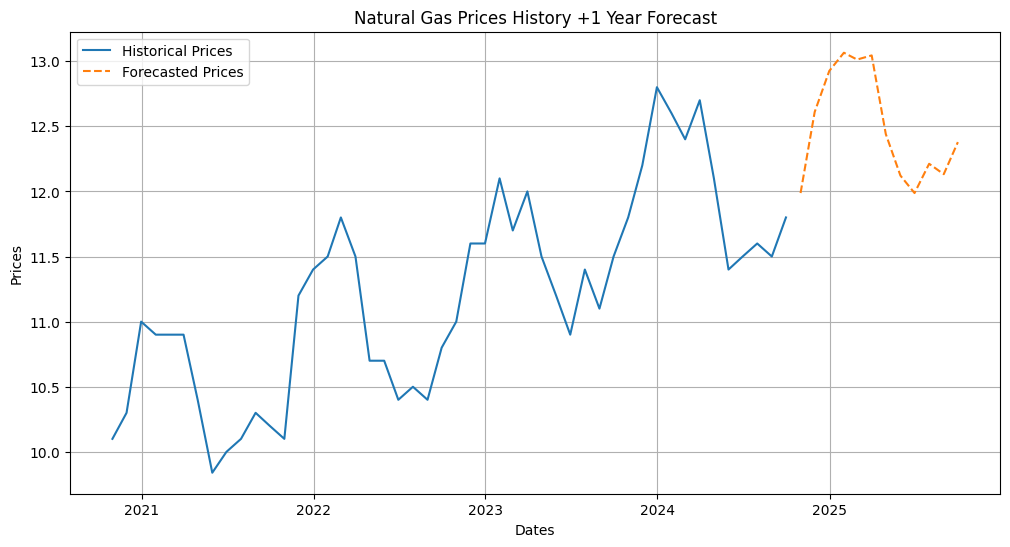

In [26]:
## final visualization
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Prices'],label='Historical Prices')
plt.plot(future_df.index, future_df['Prices'], label='Forecasted Prices', linestyle='--')
plt.legend()
plt.title("Natural Gas Prices History +1 Year Forecast")
plt.xlabel("Dates")
plt.ylabel('Prices')
plt.grid(True)
plt.show()